In [41]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [56]:
# Load Cleaned Dataset
df = pd.read_csv (r"C:\Users\darre\DataProjects\data\cleaned_ecommerce_data.csv")

# Derive order_quantity (count of product_id per order_id)
order_quantity = df.groupby(['order_id', 'product_id']).size().reset_index(name='order_quantity')
df = df.merge(order_quantity, on=['order_id', 'product_id'], how='left')

# Derive TotalPrice and YearMonth
df['TotalPrice'] = df['price'] * df['order_quantity']
df['YearMonth'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M').astype(str)

df.to_csv(r'C:\Users\darre\DataProjects\data\cleaned_ecommerce_data.csv')

# Display first few rows
print(df.head())

   Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  53cdb2fc8bc7dce0b6741e2150273451   
2           2  47770eb9100c2d0c44946d9cf07ec65d   
3           3  949d5b44dbf5de918fe9c16f97b45f8a   
4           4  ad21c59c0840e6cb83a9ceb5573f8159   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2018-07-26 03:24:27          2018-07-26 14:31:00   
2  2018-08-08 08:55:23          2018-08-08 13:50:00   
3  2017-11

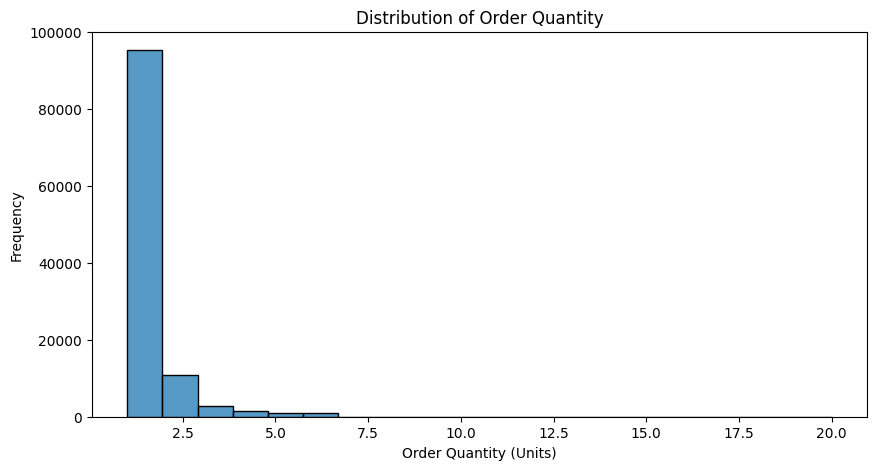

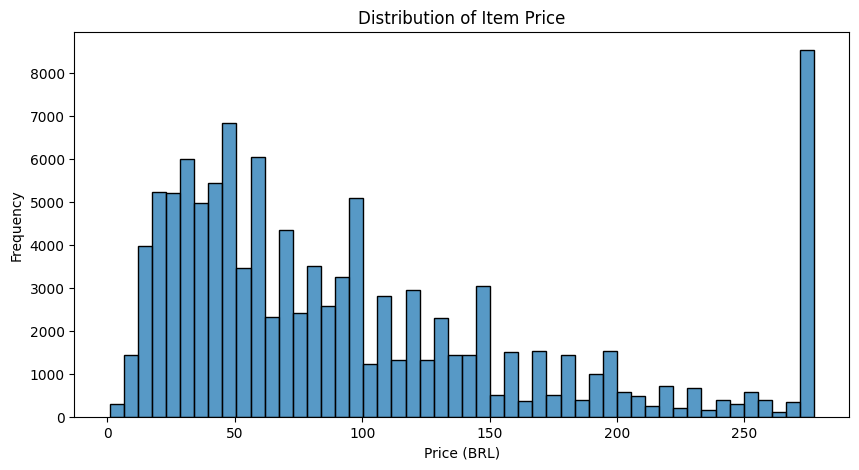

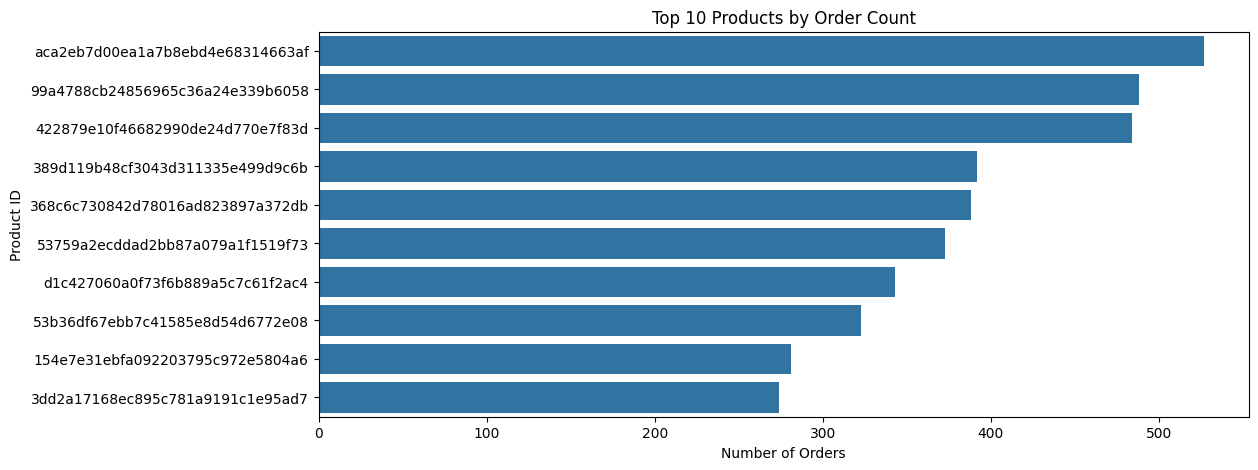

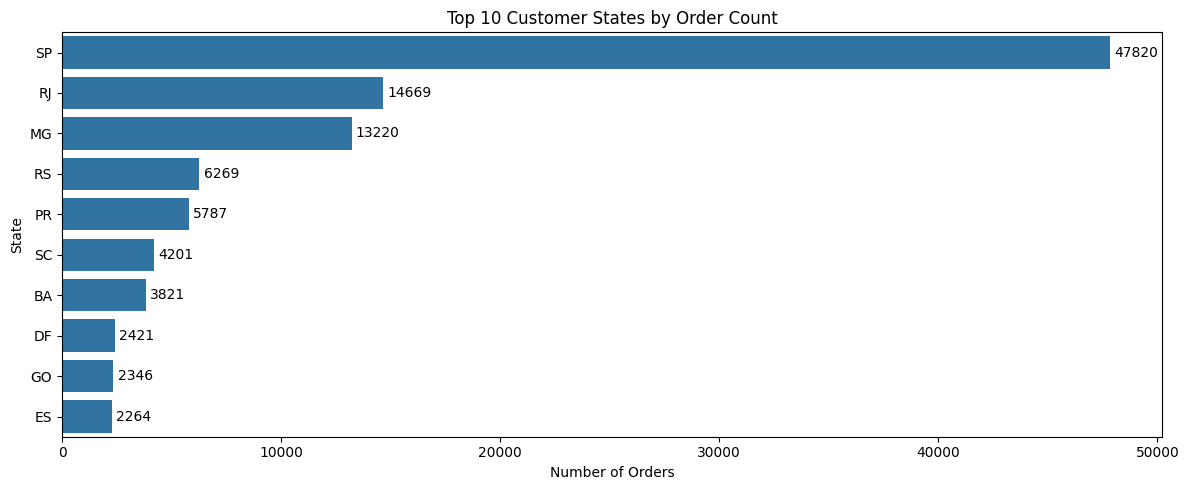

In [43]:
# Analysis of distributions and categorical variables for individual column characteristics
# Distribution of Quantity (order_item_id)
plt.figure(figsize=(10,5))
sns.histplot(df['order_quantity'], bins=20)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity (Units)')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\order_item_distribution.png")
plt.show()

# Distribution of UnitPrice
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50)
plt.title('Distribution of Item Price')
plt.xlabel('Price (BRL)')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\price_distribution.png")
plt.show()

# 3. Categorical: Top 10 products (product_id)
top_products = df['product_id'].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Product ID')
plt.savefig('../outputs/top_products.png')
plt.show()

# 4. Categorical: Orders by customer_state
top_states = df['customer_state'].value_counts().head(10)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=top_states.values, y=top_states.index)
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=3)
plt.title('Top 10 Customer States by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('../outputs/top_states.png')
plt.show()



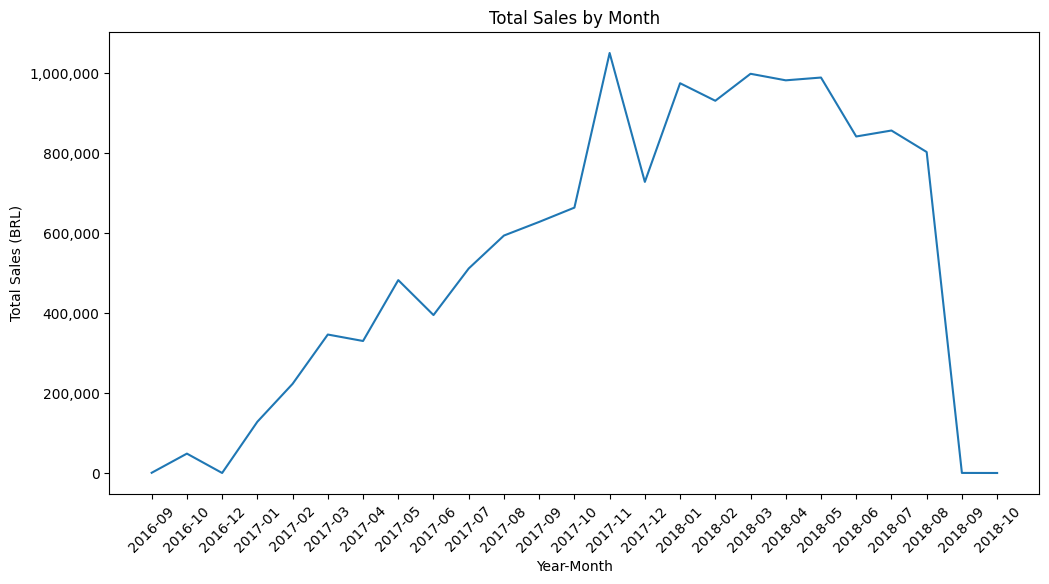

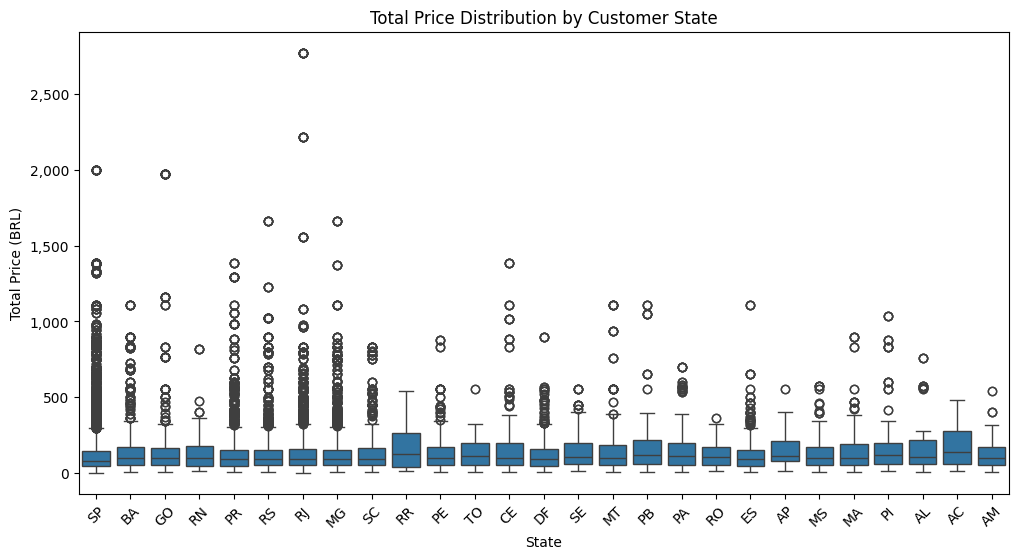

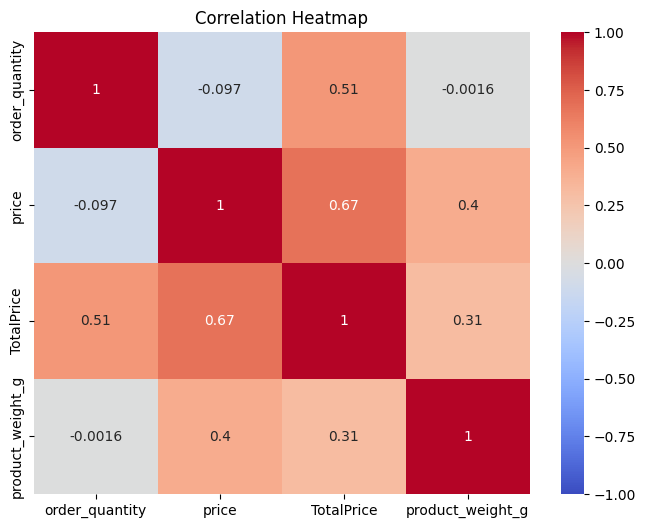

In [44]:
# Explore relationships between variables
# Sales by Time (TotalPrice by YearMonth)
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales)
plt.title('Total Sales by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (BRL)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') # Disables scientific notation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format as integers with commas
plt.savefig(r"C:\Users\darre\DataProjects\outputs\sales_trend.png")
plt.show()

# TotalPrice by Customer State - unchanged
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='TotalPrice', data=df)
plt.title('Total Price Distribution by Customer State')
plt.xlabel('State')
plt.ylabel('Total Price (BRL)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.savefig(r'C:\Users\darre\DataProjects\outputs\total_price_by_stae.png')
plt.show()

# Correlation Heatmap
corr = df[['order_quantity', 'price', 'TotalPrice', 'product_weight_g']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\correlation_heatmap.png")
plt.show()

In [45]:
# T-test: Compare average TotalPrice for SP vs. others
sp_orders = df[df['customer_state'] == 'SP']['TotalPrice']
other_orders = df[df['customer_state'] != 'SP']['TotalPrice']
t_stat, p_value = stats.ttest_ind(sp_orders.dropna(), other_orders.dropna())
print(f"T-test (SP vs Others): t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in average TotalPrice between SP and other states.")
else:
    print("No significant difference in average TotalPrice between SP and other states.")

T-test (SP vs Others): t-statistic = -17.94, p-value = 0.0000
Significant difference in average TotalPrice between SP and other states.


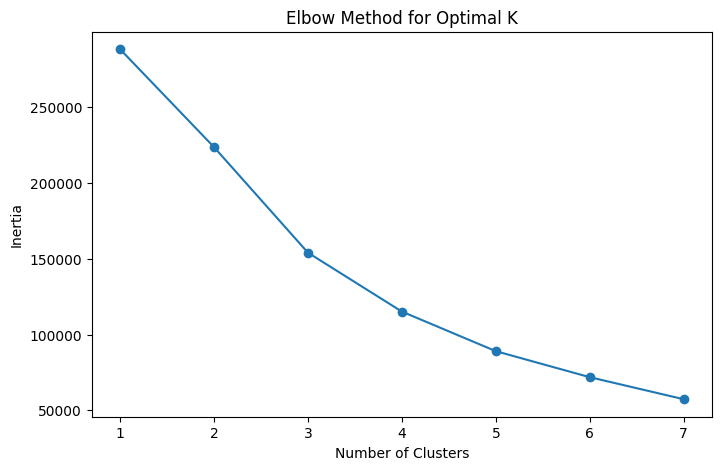

Cluster Summary:
                                Cluster_Name  Recency  Frequency  Monetary
0                     At-Risk (Poor Recency)   414.65       1.17    139.13
1       Loyal (Good Recency, High Frequency)   181.44       1.29    141.25
2  New/Low-Value (Recent but Low Spend/Freq)   161.30       1.00    104.26
3       VIP (Top recency, High Freq & Spend)   107.75       1.60    276.53

Cluster Counts:
Cluster_Name
At-Risk (Poor Recency)                       48021
New/Low-Value (Recent but Low Spend/Freq)    23986
Loyal (Good Recency, High Frequency)         17285
VIP (Top recency, High Freq & Spend)          6804
Name: count, dtype: int64

Cluster Percentages:
Cluster_Name
At-Risk (Poor Recency)                       49.97
New/Low-Value (Recent but Low Spend/Freq)    24.96
Loyal (Good Recency, High Frequency)         17.99
VIP (Top recency, High Freq & Spend)          7.08
Name: proportion, dtype: float64


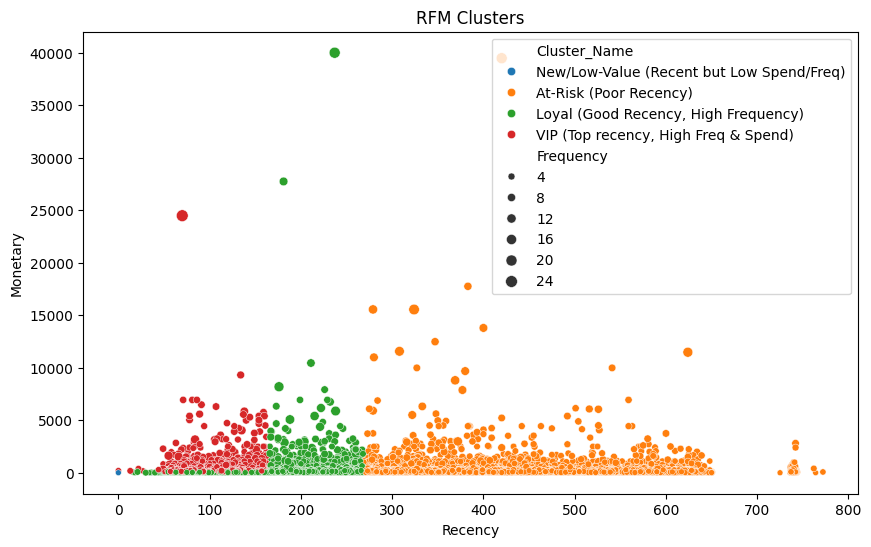

                                  Recency  Frequency  Monetary R_Score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      160          1    129.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     18.90       4   
0000f46a3911fa3c0805444483337064      585          1     69.00       1   
0000f6ccb0745a6a4b88665a16c9f078      369          1     25.99       2   
0004aac84e0df4da2b147fca70cf8255      336          1    180.00       2   
0004bd2a26a76fe21f786e4fbd80607f      194          1    154.00       3   
00050ab1314c0e55a6ca13cf7181fecf      180          1     27.99       3   
00053a61a98854899e70ed204dd4bafe      231          2    382.00       3   
0005e1862207bf6ccc02e4228effd9a0      591          1    135.00       1   
0005ef4cd20d2893f0d9fbd94d3c0d97      219          1    104.90       3   

                                 F_Score M_Score  Cluster  \
customer_unique_id                                

In [52]:
# RFM Analysis
# Recency: Days since last purchase
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
latest_date = df['order_purchase_timestamp'].max() # Date of the latest purchase for reference point
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days, # Recency
    'order_id': 'count', # Frequency
    'TotalPrice': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Quantiles for RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1], duplicates='drop') # Higher score for lower recency
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Standarize RFM features for clustering
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_numeric)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)

# Elbow method to determine optimal clusters
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('../outputs/elbow_plot.png')
plt.show()

# KMeans Clustering (use k=4 based on elbow plot or business judgement)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Name clusters based on RFM means
cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

def name_cluster(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r >= 4 and f >= 3 and m >= 3:
        return 'VIP (Top recency, High Freq & Spend)'
    elif r >= 3 and f>=3:
        return 'Loyal (Good Recency, High Frequency)'
    elif r <= 2:
        return 'At-Risk (Poor Recency)'
    else:
        return 'New/Low-Value (Recent but Low Spend/Freq)'

rfm['Cluster_Name'] = rfm.apply(name_cluster, axis=1)
print('Cluster Summary:')
print(rfm.groupby('Cluster_Name')[['Recency', 'Frequency', 'Monetary']].mean().round(2).reset_index())
print("\nCluster Counts:")
print(rfm['Cluster_Name'].value_counts())
print("\nCluster Percentages:")
print(rfm['Cluster_Name'].value_counts(normalize=True).mul(100).round(2))

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_Name', size='Frequency', data=rfm)
plt.title('RFM Clusters')
plt.savefig('../outputs/rfm_clusters.png')
plt.show()

print(rfm.head(10))

In [55]:
# Export customer segments for Power BI
rfm[['Cluster', 'Cluster_Name', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']].to_csv(r'C:\Users\darre\DataProjects\data\customer_segments.csv', index=True)
print("Exported customer_segments.csv for Power BI")

Exported customer_segments.csv for Power BI
